In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\User\Documents\Assessment\Tetuan City power consumption.csv')

In [3]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
df.shape

(52416, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [7]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [8]:
df.rename(
    columns=({ 'Wind Speed': 'wind_speed', 'general diffuse flows': 'general_diffuse_flows', 'diffuse flows': 'diffuse_flows', 'Zone 1 Power Consumption' : 'zone_1_pc', 'Zone 2  Power Consumption' : 'zone_2_pc', 'Zone 3  Power Consumption' : 'zone_3_pc'}), 
    inplace=True,
)
df.head()

,DateTime,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


<AxesSubplot:>

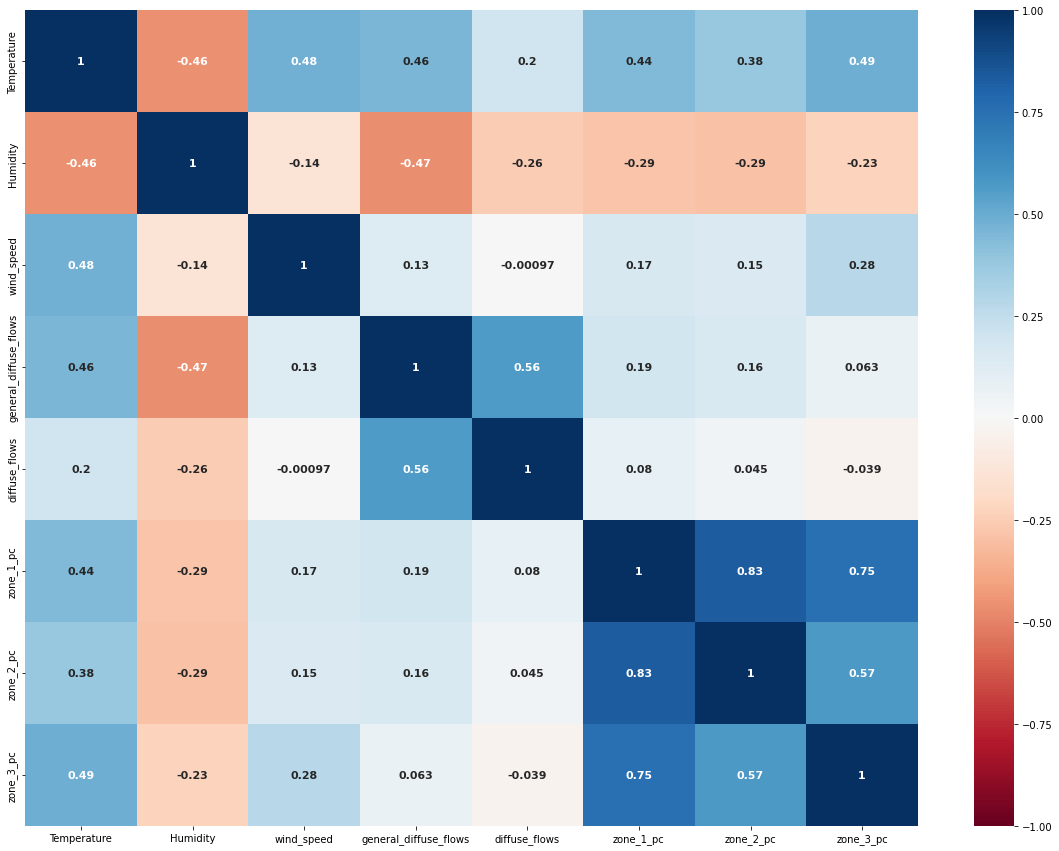

In [9]:
corr = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, 
            annot_kws={'fontsize':11, 'fontweight':'bold'})

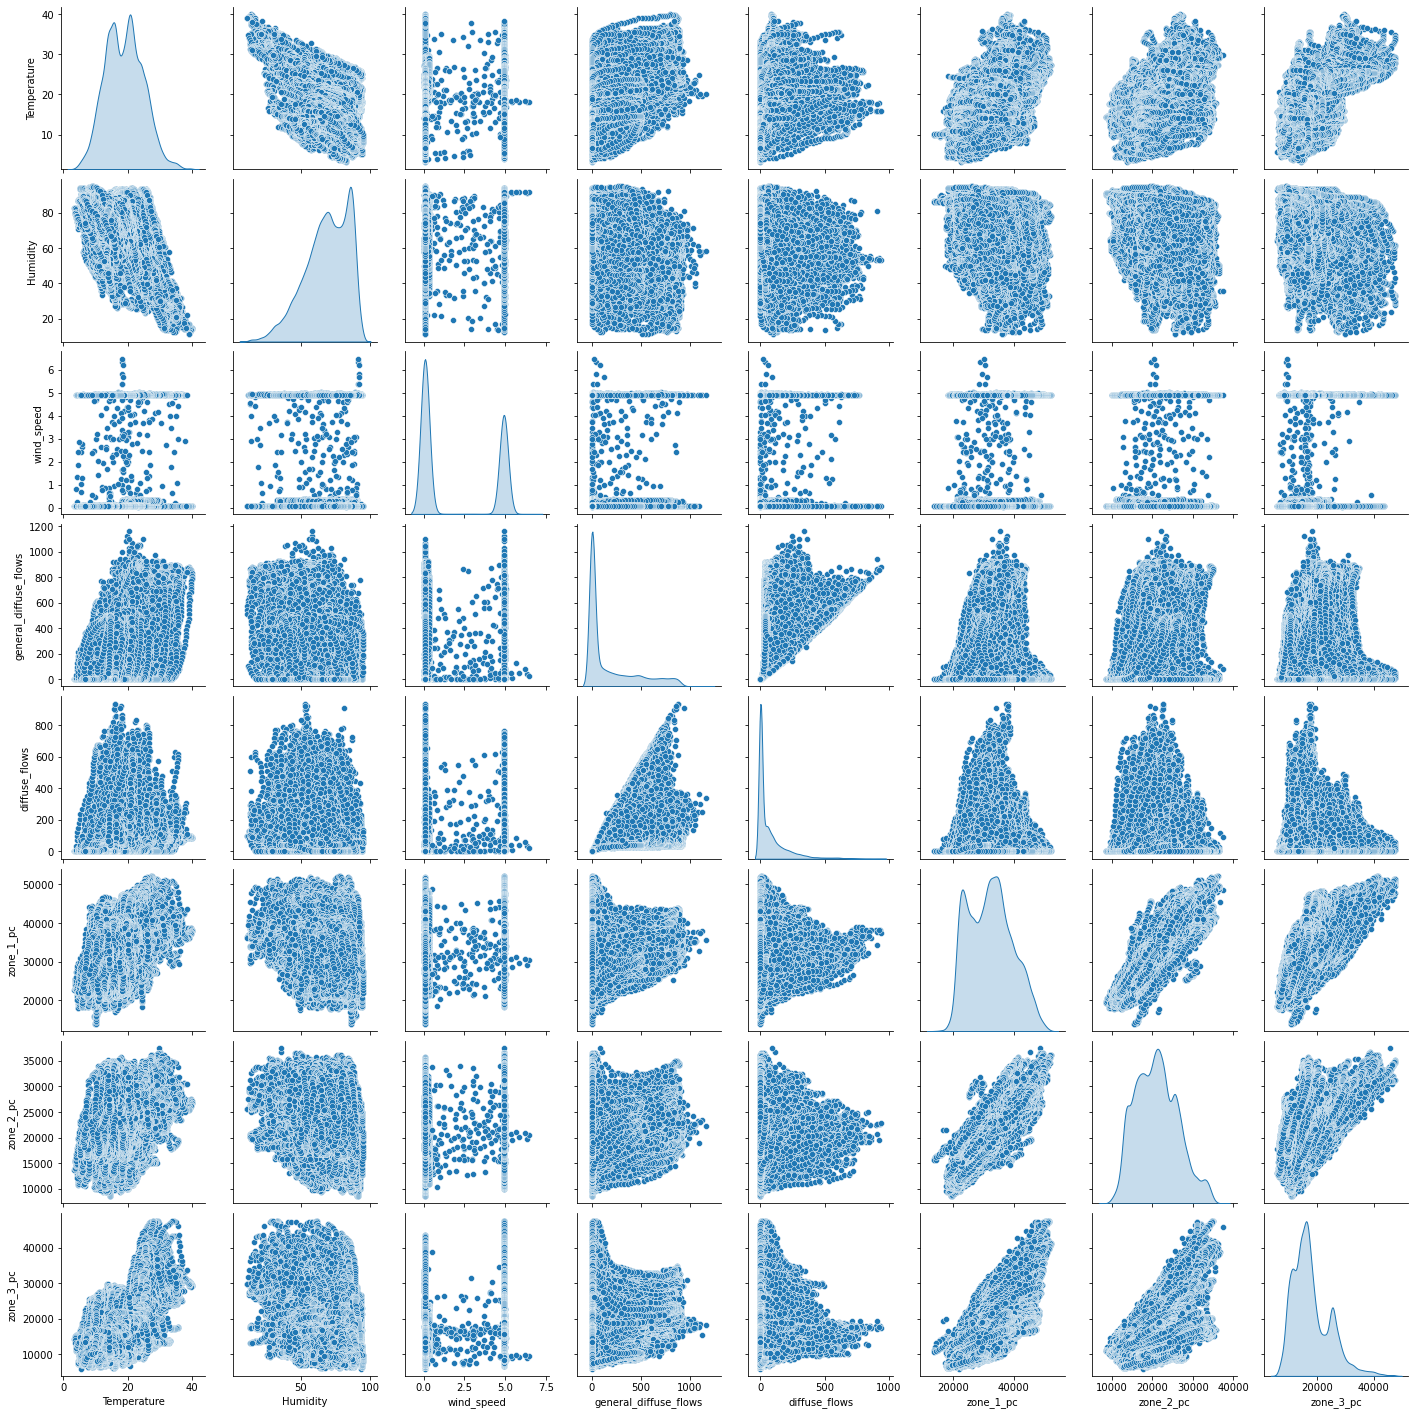

In [10]:
sns.pairplot(df, diag_kind='kde')

In [11]:
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)

In [12]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df
df = create_features(df)

<AxesSubplot:xlabel='Temperature'>

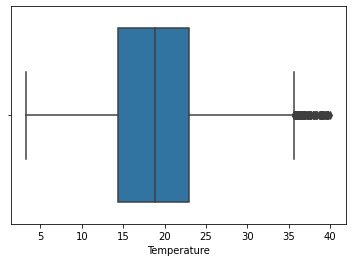

In [13]:
sns.boxplot(x=df['Temperature'])

In [14]:
Q1 = df.Temperature.quantile(0.25)
Q3 = df.Temperature.quantile(0.75)
Q1,Q3

(14.41, 22.89)

In [15]:
IQR = Q3 - Q1
IQR

8.48

In [16]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit, upper_limit

(1.6899999999999995, 35.61)

In [17]:
df.Temperature.shape

(52416,)

In [18]:
df[(df['Temperature'] <= lower_limit) | (df['Temperature'] >= upper_limit)]


,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,
2017-07-07 12:00:00,35.78,27.88,4.921,841.0,94.4,29444.25249,30592.40506,27378.07531,12,4,3,7,2017,188,7,27
2017-07-07 12:10:00,36.21,26.75,4.923,850.0,94.7,32799.46844,27759.49367,25359.66527,12,4,3,7,2017,188,7,27
2017-07-07 12:20:00,36.37,26.71,4.922,855.0,95.3,36716.01329,25659.49367,25444.01674,12,4,3,7,2017,188,7,27
2017-07-07 12:30:00,36.69,26.52,4.920,860.0,95.7,36422.59136,25131.64557,25028.28452,12,4,3,7,2017,188,7,27
2017-07-07 12:40:00,36.59,31.89,4.925,862.0,96.2,36129.16944,24850.63291,25094.56067,12,4,3,7,2017,188,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11 14:40:00,35.94,20.34,4.903,752.0,137.3,39380.24417,28492.08025,26404.51411,14,4,3,8,2017,223,11,32
2017-08-11 14:50:00,35.89,20.51,4.905,736.0,137.8,39277.95782,28503.48469,25814.67085,14,4,3,8,2017,223,11,32
2017-08-11 15:00:00,35.66,21.81,4.902,723.0,139.4,39220.42175,28237.38120,25796.61442,15,4,3,8,2017,223,11,32


In [19]:
df_temp_no_out = df[(df['Temperature']<=lower_limit)|(df['Temperature']>=upper_limit)].index
df.drop(df_temp_no_out , inplace=True)

In [20]:
df_temp_no_out.shape

(143,)

In [21]:
df.Temperature.shape

(52273,)

<AxesSubplot:xlabel='Temperature'>

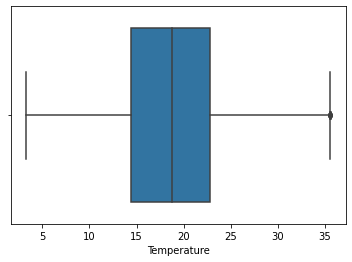

In [22]:
sns.boxplot(x=df['Temperature'])

<AxesSubplot:xlabel='Humidity'>

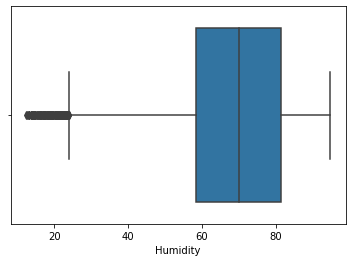

In [23]:
sns.boxplot(x=df['Humidity'])

In [24]:
Q1 = df.Humidity.quantile(0.25)
Q3 = df.Humidity.quantile(0.75)
Q1,Q3

(58.41, 81.4)

In [25]:
IQR = Q3 - Q1
IQR

22.99000000000001

In [26]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit, upper_limit

(23.924999999999983, 115.88500000000002)

In [27]:
df.Humidity.shape

(52273,)

In [28]:
df[(df['Humidity'] <= lower_limit) | (df['Humidity'] >= upper_limit)]

,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,
2017-05-05 18:30:00,25.41,23.79,4.919,234.3,259.5,33489.83607,20901.54799,17221.70040,18,4,2,5,2017,125,5,18
2017-05-05 18:40:00,25.27,23.52,4.920,207.3,230.7,34169.70492,21299.07121,18037.89474,18,4,2,5,2017,125,5,18
2017-05-05 18:50:00,25.20,23.66,4.918,173.9,194.8,35013.24590,21904.64396,19151.41700,18,4,2,5,2017,125,5,18
2017-05-13 13:20:00,31.71,21.96,0.070,863.0,204.4,35693.11475,21562.84830,18720.00000,13,5,2,5,2017,133,13,19
2017-05-13 13:30:00,31.73,20.92,0.073,856.0,204.4,35680.52459,21510.83591,18807.44939,13,5,2,5,2017,133,13,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-22 16:40:00,31.06,14.80,4.934,407.7,88.0,34139.46903,19747.60915,13137.97753,16,4,3,9,2017,265,22,38
2017-09-22 16:50:00,30.84,19.21,4.929,369.3,87.3,33661.59292,19998.33680,13302.71706,16,4,3,9,2017,265,22,38
2017-09-22 17:00:00,30.44,20.21,4.945,347.0,94.2,33604.24779,19571.72557,13614.54545,17,4,3,9,2017,265,22,38


In [29]:
df_hum_no_out = df[(df['Humidity']<=lower_limit)|(df['Humidity']>=upper_limit)].index
df.drop(df_hum_no_out , inplace=True)

In [30]:
df_hum_no_out.shape

(199,)

In [31]:
df.Humidity.shape

(52074,)

<AxesSubplot:xlabel='Humidity'>

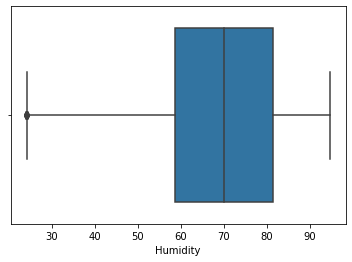

In [32]:
sns.boxplot(x=df['Humidity'])

<AxesSubplot:xlabel='wind_speed'>

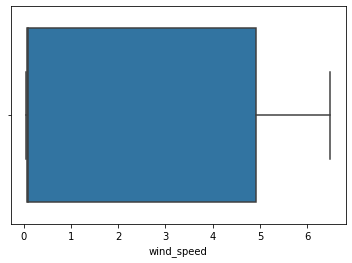

In [33]:
sns.boxplot(x=df['wind_speed'])

In [34]:
Q1 = df.wind_speed.quantile(0.25)
Q3 = df.wind_speed.quantile(0.75)
Q1,Q3

(0.078, 4.915)

In [35]:
IQR = Q3 - Q1
IQR

4.837

In [36]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit, upper_limit

(-7.177499999999999, 12.1705)

In [37]:
df[(df['wind_speed'] <= lower_limit) | (df['wind_speed'] >= upper_limit)]

,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,


In [38]:
df_ws_no_out = df[(df['wind_speed']<=lower_limit)|(df['wind_speed']>=upper_limit)].index
df.drop(df_ws_no_out , inplace=True)

<AxesSubplot:xlabel='general_diffuse_flows'>

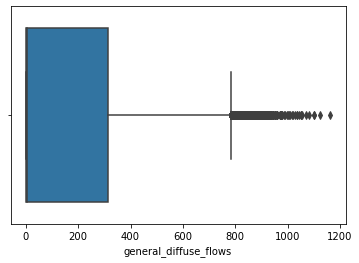

In [39]:
sns.boxplot(x=df['general_diffuse_flows'])

In [40]:
Q1 = df.general_diffuse_flows.quantile(0.25)
Q3 = df.general_diffuse_flows.quantile(0.75)
Q1,Q3

(0.062, 313.1)

In [41]:
IQR = Q3 - Q1
IQR

313.038

In [42]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit, upper_limit

(-469.495, 782.657)

In [43]:
df.general_diffuse_flows.shape

(52074,)

In [44]:
df[(df['general_diffuse_flows'] <= lower_limit) | (df['general_diffuse_flows'] >= upper_limit)]

,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,
2017-02-14 12:30:00,16.68,53.06,0.082,803.0,269.8,33004.06780,21333.73860,16550.59296,12,1,1,2,2017,45,14,7
2017-02-21 13:00:00,15.92,55.29,0.083,810.0,851.0,37885.42373,22431.61094,17818.37186,13,1,1,2,2017,52,21,8
2017-02-21 13:10:00,15.86,53.22,0.084,877.0,933.0,38245.42373,22683.28267,17887.83920,13,1,1,2,2017,52,21,8
2017-02-21 13:20:00,15.92,53.16,0.079,845.0,897.0,38288.13559,22519.14894,17847.31658,13,1,1,2,2017,52,21,8
2017-02-21 13:30:00,16.25,53.52,0.082,818.0,855.0,38306.44068,22464.43769,17829.94975,13,1,1,2,2017,52,21,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-12 12:30:00,25.45,42.95,0.082,822.0,190.6,37824.42013,23713.69295,13632.58359,12,3,4,10,2017,285,12,41
2017-11-02 11:50:00,21.53,52.60,0.084,794.0,733.0,31440.00000,24318.59504,12572.53012,11,3,4,11,2017,306,2,44
2017-11-02 13:10:00,22.06,51.47,0.084,841.0,820.0,31680.00000,24753.71901,12774.93976,13,3,4,11,2017,306,2,44


In [45]:
df_gdf_no_out = df[(df['general_diffuse_flows']<=lower_limit)|(df['general_diffuse_flows']>=upper_limit)].index
df.drop(df_gdf_no_out , inplace=True)

In [46]:
df_gdf_no_out.shape

(2508,)

In [47]:
df.general_diffuse_flows.shape

(49566,)

<AxesSubplot:xlabel='general_diffuse_flows'>

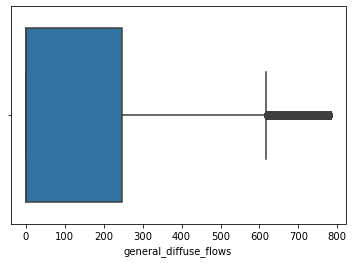

In [48]:
sns.boxplot(x=df['general_diffuse_flows'])

In [49]:
df.columns

Index(['Temperature', 'Humidity', 'wind_speed', 'general_diffuse_flows',
       'diffuse_flows', 'zone_1_pc', 'zone_2_pc', 'zone_3_pc', 'hour',
       'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth',
       'weekofyear'],
      dtype='object')

<AxesSubplot:xlabel='diffuse_flows'>

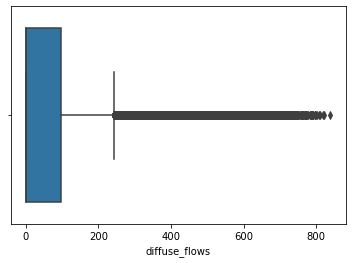

In [50]:
sns.boxplot(x=df['diffuse_flows'])

In [51]:
Q1 = df.diffuse_flows.quantile(0.25)
Q3 = df.diffuse_flows.quantile(0.75)
Q1,Q3

(0.119, 97.3)

In [52]:
IQR = Q3 - Q1
IQR

97.181

In [53]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit, upper_limit

(-145.6525, 243.07150000000001)

In [54]:
df.diffuse_flows.shape

(49566,)

In [55]:
df[(df['diffuse_flows'] <= lower_limit) | (df['diffuse_flows'] >= upper_limit)]

,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,
2017-01-01 16:20:00,15.54,58.30,0.076,241.3,246.0,28556.96203,17325.22796,16192.771080,16,6,1,1,2017,1,1,52
2017-01-01 16:30:00,15.53,58.80,0.077,219.0,248.1,28514.43038,17456.53495,16343.132530,16,6,1,1,2017,1,1,52
2017-01-02 16:20:00,15.23,61.12,0.075,238.2,253.4,29480.50633,20611.55015,16181.204820,16,0,1,1,2017,2,2,1
2017-01-02 16:30:00,15.24,61.63,0.075,216.8,248.1,30161.01266,20545.89666,16314.216870,16,0,1,1,2017,2,2,1
2017-01-03 16:10:00,15.34,66.83,0.071,259.9,256.6,31874.43038,21045.59271,16458.795180,16,1,1,1,2017,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-14 12:40:00,15.09,63.14,0.076,539.1,283.7,31513.30798,25966.24732,10763.985590,12,3,4,12,2017,348,14,50
2017-12-15 15:00:00,16.69,59.35,0.081,478.0,288.4,30996.19772,25885.24087,9283.073229,15,4,4,12,2017,349,15,50
2017-12-20 16:40:00,17.09,69.66,0.073,235.5,252.8,32097.33840,26327.09420,9911.164466,16,2,4,12,2017,354,20,51


In [56]:
df_df_no_out = df[(df['diffuse_flows']<=lower_limit)|(df['diffuse_flows']>=upper_limit)].index
df.drop(df_df_no_out , inplace=True)

In [57]:
df_df_no_out.shape

(4619,)

In [58]:
df.diffuse_flows.shape

(44947,)

<AxesSubplot:xlabel='diffuse_flows'>

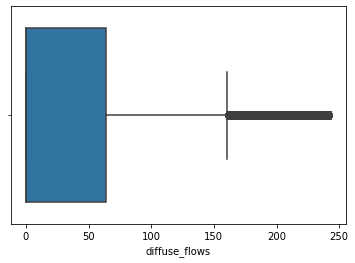

In [59]:
sns.boxplot(x=df['diffuse_flows'])

In [60]:
df.describe()

,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
count,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.0,44947.000000,44947.000000,44947.000000
mean,18.140406,70.155848,1.911447,115.028420,39.812293,32010.986712,20898.600504,17595.815550,11.243442,3.012793,2.561995,6.681314,2017.0,187.740561,15.691147,27.268249
std,5.539557,14.576014,2.336856,202.084403,61.920831,7459.266131,5387.140608,6752.522573,7.362221,2.001999,1.145628,3.553881,0.0,108.750483,8.773969,15.526240
min,3.247000,23.970000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,0.000000,0.000000,1.000000,1.000000,2017.0,1.000000,1.000000,1.000000
25%,13.980000,60.390000,0.078000,0.059000,0.115000,25465.387540,16556.993410,12623.902060,5.000000,1.000000,1.000000,3.000000,2017.0,90.000000,8.000000,13.000000
50%,18.010000,71.800000,0.085000,0.099000,0.167000,31561.731410,20589.665650,16054.838710,10.000000,3.000000,3.000000,7.000000,2017.0,195.000000,16.000000,28.000000
75%,22.080000,82.800000,4.915000,144.650000,64.275000,37494.451405,24873.417720,21621.213485,18.000000,5.000000,4.000000,10.000000,2017.0,284.000000,23.000000,41.000000
max,35.580000,94.800000,6.483000,782.000000,242.900000,52204.395120,37408.860760,47598.326360,23.000000,6.000000,4.000000,12.000000,2017.0,364.000000,31.000000,52.000000


In [61]:
# df['Power'] = df['zone_1_pc'] + df['zone_2_pc'] + df['zone_3_pc']

In [62]:
# df.head()

<AxesSubplot:xlabel='hour', ylabel='zone_1_pc'>

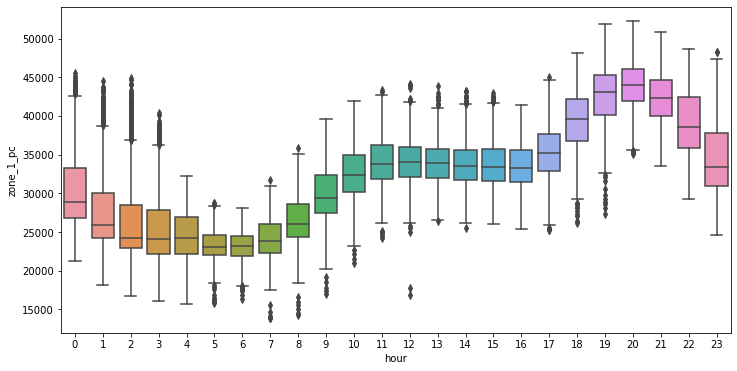

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(x='hour',y='zone_1_pc',data=df)


<AxesSubplot:xlabel='hour', ylabel='zone_2_pc'>

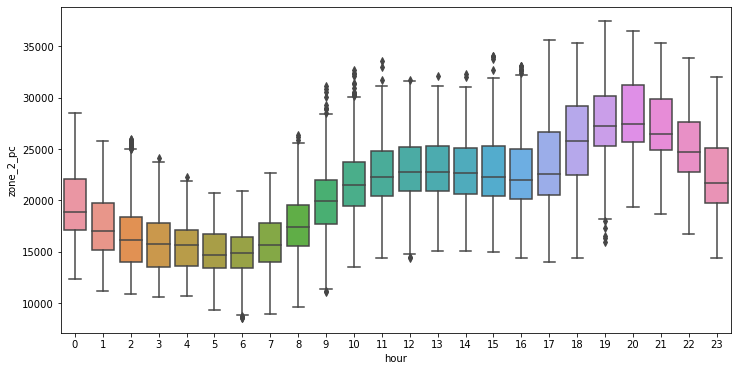

In [64]:
plt.figure(figsize=(12,6))
sns.boxplot(x='hour',y='zone_2_pc',data=df)

<AxesSubplot:xlabel='hour', ylabel='zone_3_pc'>

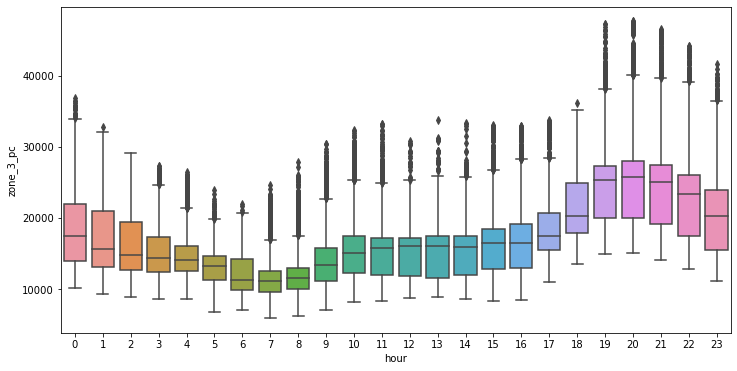

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(x='hour',y='zone_3_pc',data=df)

In [ ]:
x = df['hour']
y1 = df['zone_1_pc']
y2 = df['zone_2_pc']
y3 = df['zone_3_pc']
width = 0.3
plt.figure(figsize=(8,10))
plt.bar(x-0.3, y1, width, color='red')
plt.bar(x, y2, width, color='orange')
plt.bar(x-0.3, y3, width, color='yellow')
plt.xlabel("hour")
plt.xticks(['Spring',2,3,4])
plt.ylabel("Power consumption per hour")
plt.legend(['zone_1_pc', 'zone_2_pc', 'zone_3_pc'])
plt.show()

In [ ]:
x = df['month']
y1 = df['zone_1_pc']
y2 = df['zone_2_pc']
y3 = df['zone_3_pc']
width = 0.3
plt.figure(figsize=(8,10))
plt.bar(x-0.3, y1, width, color='red')
plt.bar(x, y2, width, color='orange')
plt.bar(x-0.3, y3, width, color='yellow')
plt.xlabel("month")
plt.xticks(['Spring',2,3,4])
plt.ylabel("Power consumption per hour")
plt.legend(['zone_1_pc', 'zone_2_pc', 'zone_3_pc'])
plt.show()

In [ ]:
x = df['quarter']
y1 = df['zone_1_pc']
y2 = df['zone_2_pc']
y3 = df['zone_3_pc']
width = 0.3
plt.figure(figsize=(8,10))
plt.bar(x-0.3, y1, width, color='red')
plt.bar(x, y2, width, color='orange')
plt.bar(x-0.3, y3, width, color='yellow')
plt.xlabel("quarter")
plt.xticks(['Spring',2,3,4])
plt.ylabel("Power consumption per hour")
plt.legend(['zone_1_pc', 'zone_2_pc', 'zone_3_pc'])
plt.show()

In [66]:
df.columns

Index(['Temperature', 'Humidity', 'wind_speed', 'general_diffuse_flows',
       'diffuse_flows', 'zone_1_pc', 'zone_2_pc', 'zone_3_pc', 'hour',
       'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth',
       'weekofyear'],
      dtype='object')

In [67]:
df.head()

,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone_1_pc,zone_2_pc,zone_3_pc,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,2017,1,1,52
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,2017,1,1,52
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,2017,1,1,52
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,2017,1,1,52
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,6,1,1,2017,1,1,52


In [69]:
# df.drop(['Power'], axis=1, inplace = True)
# df.head()

In [ ]:
# df_melted = df.melt(id_vars=['Temperature', 'Humidity', 'wind_speed', 'general_diffuse_flows', 'diffuse_flows', 'hour', 'dayofweek', 'quarter', 'month'], value_vars=['zone_1_pc', 'zone_2_pc', 'zone_3_pc'])
# df_melted.head()

In [ ]:
# df_melted.rename(columns={'variable': 'Zone', 'value': 'Power'}, inplace=True)
# df_melted.tail()

In [ ]:
# sns.boxplot(data=df_melted, x='Power', y='hour', hue="Zone").set(title='Power Consumption by Hour')
# plt.xlabel('Hour')
# plt.ylabel('Power')

In [ ]:
# sns.boxplot(data=df_melted, x='Power', y='dayofweek', hue="Zone").set(title='Power Consumption by Day of week')
# plt.xlabel('Hour')
# plt.ylabel('Power')

In [ ]:
# sns.boxplot(data=df_melted, x='Power', y='month', hue="Zone").set(title='Power Consumption by month')
# plt.xlabel('Hour')
# plt.ylabel('Power')

In [ ]:
# sns.boxplot(data=df_melted, x='Power', y='quarter', hue="Zone").set(title='Power Consumption by quarter')
# plt.xlabel('Hour')
# plt.ylabel('Power')

In [ ]:
# sns.boxplot(data=df_melted, x='Temperature', y='hour').set(title='Temperature by hour')
# plt.xlabel('Hour')
# plt.ylabel('Temperature')

In [ ]:
# sns.boxplot(data=df_melted, x='Humidity', y='hour').set(title='Humidity by hour')
# plt.xlabel('Hour')
# plt.ylabel('Humidity')

In [ ]:
# sns.boxplot(data=df_melted, x='wind_speed', y='hour').set(title='Humidity by hour')
# plt.xlabel('Hour')
# plt.ylabel('Wind Speed')

In [ ]:
# sns.boxplot(data=df_melted, x='general_diffuse_flows', y='hour').set(title='Humidity by hour')
# plt.xlabel('Hour')
# plt.ylabel('General Diffuse Flows')

In [ ]:
# sns.boxplot(data=df_melted, x='diffuse_flows', y='hour').set(title='Humidity by hour')
# plt.xlabel('Hour')
# plt.ylabel('Diffuse Flows')

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

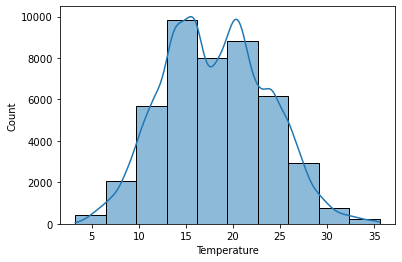

In [70]:
sns.histplot(df["Temperature"], kde=True, bins = 10)

<AxesSubplot:xlabel='Humidity', ylabel='Count'>

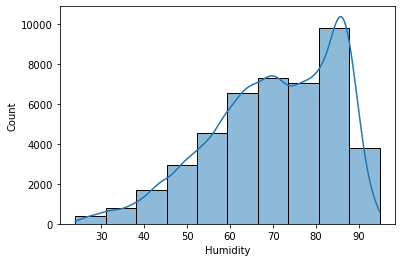

In [71]:
sns.histplot(df["Humidity"], kde=True, bins = 10)

<AxesSubplot:xlabel='wind_speed', ylabel='Count'>

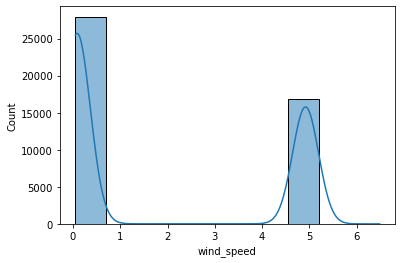

In [72]:
sns.histplot(df["wind_speed"], kde=True, bins = 10)

<AxesSubplot:xlabel='general_diffuse_flows', ylabel='Count'>

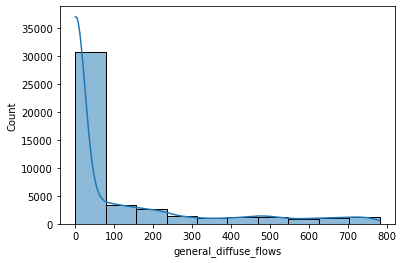

In [73]:
sns.histplot(df["general_diffuse_flows"], kde=True, bins = 10)

<AxesSubplot:xlabel='diffuse_flows', ylabel='Count'>

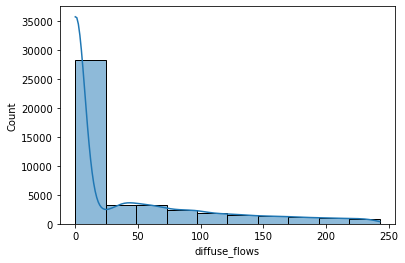

In [74]:
sns.histplot(df["diffuse_flows"], kde=True, bins = 10)

In [75]:
df.columns

Index(['Temperature', 'Humidity', 'wind_speed', 'general_diffuse_flows',
       'diffuse_flows', 'zone_1_pc', 'zone_2_pc', 'zone_3_pc', 'hour',
       'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth',
       'weekofyear'],
      dtype='object')

In [86]:
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import warnings
import time
warnings.filterwarnings('ignore')
x_columns = ["month","dayofweek","hour","Temperature", "Humidity", "wind_speed", "general_diffuse_flows", "diffuse_flows"]
y_column_zone_1 = "zone_1_pc"
y_column_zone_2 = "zone_2_pc"
y_column_zone_3 = "zone_3_pc"
y_columns = [y_column_zone_1, y_column_zone_2, y_column_zone_3]
KFOLD_NSPLITS = 3
pd.set_option('display.max_rows', 500)

In [87]:
def normalized(Xtrain, Xtest=None):
  scaler = StandardScaler()
  scaler.fit(Xtrain)
  Xtrain = scaler.transform(Xtrain)
  if Xtest:
    Xtest = scaler.transform(Xtest)
    return (Xtrain, Xtest)
  return Xtrain

In [88]:
normalized(df[["Temperature", "Humidity", "wind_speed", "general_diffuse_flows", "diffuse_flows"]])

array([[-2.09069696,  0.25001295, -0.78244759, -0.56896375, -0.64104008],
       [-2.11687263,  0.29803759, -0.78244759, -0.56886973, -0.64158918],
       [-2.13510533,  0.29803759, -0.78373138, -0.56890931, -0.64134693],
       ...,
       [-2.02913901,  0.18140633, -0.7811638 , -0.56880045, -0.64176682],
       [-2.05477311,  0.19512765, -0.78373138, -0.56888952, -0.64152458],
       [-2.086906  ,  0.27059494, -0.78330345, -0.56890931, -0.64116928]])

In [89]:
def multiple_reg(df, x_columns, y_column):
  start_time = time.perf_counter()
  X = df[x_columns].to_numpy()
  Y = df[y_column].to_numpy()

  kf = KFold(n_splits=KFOLD_NSPLITS)

  performance_test=[]
  rscore = []
  
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    regr = linear_model.LinearRegression()
    regr.fit(X_train, Y_train)
    Y_pred = regr.predict(X_test)

    r2 = r2_score(Y_test, Y_pred)  
    mape = mean_absolute_percentage_error(y_true = Y_test, y_pred = Y_pred)

    rscore.append(r2)
    performance_test.append(mape)  
    duration = (time.perf_counter() - start_time)/60
  return (np.mean(rscore), np.mean(performance_test), np.std(performance_test), duration)

In [ ]:
multiple_reg_results = pd.DataFrame()
idx = 0
for y_column in y_columns:
    idx = idx + 1
    r2, mape, confidence_interval, duration = multiple_reg(df, x_columns, y_column)
    multiple_reg_results.loc[idx,'zone'] = y_column
    multiple_reg_results.loc[idx,'r2'] = r2
    multiple_reg_results.loc[idx,'mape'] = mape
    multiple_reg_results.loc[idx,'confidence_interval'] = confidence_interval
    multiple_reg_results.loc[idx,'duration (m)'] = duration
    print(f"y_column: {y_column}, r2: {r2}, mape: {mape}, confidence_interval: {confidence_interval}, duration: {duration}")
multiple_reg_results

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def random_forest(df, x_columns, y_column, n_estimators = 10, max_features=2):
  start_time = time.perf_counter()
  df = df.sample(frac=1)
  X = df[x_columns].to_numpy()
  Y = df[y_column].to_numpy()

  kf = KFold(n_splits=KFOLD_NSPLITS)

  performance_test=[]
  rscore = []
  
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    clf = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)

    r2 = r2_score(Y_test, y_pred)  
    mape = mean_absolute_percentage_error(y_true = Y_test, y_pred = y_pred)

    rscore.append(r2)
    performance_test.append(mape)  
  duration = (time.perf_counter() - start_time)/60
  return (np.mean(rscore), np.mean(performance_test), np.std(performance_test), duration)
  

In [92]:
df.columns.values
result_rf = pd.DataFrame()
idx = 0
for y_column in y_columns:
    for n_estimators in [5,10,15,20]:
        for max_features in [2,3,4,5]:
            idx = idx + 1
            r2, mape, confidence_interval, duration = random_forest(df, x_columns, y_column, n_estimators, max_features)
            result_rf.loc[idx,'zona'] = y_column
            result_rf.loc[idx,'max_features'] = max_features
            result_rf.loc[idx,'n_estimators'] = n_estimators
            result_rf.loc[idx,'r2'] = r2
            result_rf.loc[idx,'mape'] = mape
            result_rf.loc[idx,'confidence_interval'] = confidence_interval
            result_rf.loc[idx,'duration (m)'] = duration
            print(f"y_column: {y_column}, n_estimators: {n_estimators}, max_features: {max_features}, r2: {r2}, mape: {mape}, confidence_interval: {confidence_interval}, duration: {duration}")
result_rf

y_column: zone_1_pc, n_estimators: 5, max_features: 2, r2: 0.951677710647615, mape: 0.03603066915539049, confidence_interval: 0.0013076985855847464, duration: 0.03025803666666699
y_column: zone_1_pc, n_estimators: 5, max_features: 3, r2: 0.9628727773872591, mape: 0.031284119543269706, confidence_interval: 0.00015769266744207873, duration: 0.03810617000000036
y_column: zone_1_pc, n_estimators: 5, max_features: 4, r2: 0.9664168751775106, mape: 0.029452495603301838, confidence_interval: 0.0002827208140963745, duration: 0.04647928499999997
y_column: zone_1_pc, n_estimators: 5, max_features: 5, r2: 0.9678298467811985, mape: 0.02886644968746249, confidence_interval: 9.831862448646181e-05, duration: 0.05514801333333329
y_column: zone_1_pc, n_estimators: 10, max_features: 2, r2: 0.9629414852587036, mape: 0.03220830683229419, confidence_interval: 0.0001981881398787694, duration: 0.05875812666666699
y_column: zone_1_pc, n_estimators: 10, max_features: 3, r2: 0.9684380243922187, mape: 0.029083274

,zona,max_features,n_estimators,r2,mape,confidence_interval,duration (m)
1,zone_1_pc,2.0,5.0,0.951678,0.036031,0.001308,0.030258
2,zone_1_pc,3.0,5.0,0.962873,0.031284,0.000158,0.038106
3,zone_1_pc,4.0,5.0,0.966417,0.029452,0.000283,0.046479
4,zone_1_pc,5.0,5.0,0.967830,0.028866,0.000098,0.055148
5,zone_1_pc,2.0,10.0,0.962941,0.032208,0.000198,0.058758
6,zone_1_pc,3.0,10.0,0.968438,0.029083,0.000137,0.074821
7,zone_1_pc,4.0,10.0,0.970683,0.027717,0.000216,0.090815
8,zone_1_pc,5.0,10.0,0.972141,0.026912,0.000098,0.108647
9,zone_1_pc,2.0,15.0,0.965579,0.031119,0.000366,0.086457
10,zone_1_pc,3.0,15.0,0.970296,0.028459,0.000208,0.112259


In [93]:
df.head()
df.corr()[["zone_1_pc", "zone_2_pc", "zone_3_pc"]]

,zone_1_pc,zone_2_pc,zone_3_pc
Temperature,0.427564,0.361182,0.457946
Humidity,-0.270277,-0.292971,-0.198055
wind_speed,0.148143,0.116708,0.245887
general_diffuse_flows,0.134867,0.139310,-0.023477
diffuse_flows,0.114340,0.107226,-0.047893
zone_1_pc,1.000000,0.838605,0.753822
zone_2_pc,0.838605,1.000000,0.558326
zone_3_pc,0.753822,0.558326,1.000000
hour,0.740572,0.685910,0.465117
dayofweek,-0.057070,-0.109033,0.007091


In [ ]:
def decision_tree(df, x_columns, y_column):
  start_time = time.perf_counter()
  X = df[x_columns].to_numpy()
  Y = df[y_column].to_numpy()

  kf = KFold(n_splits=KFOLD_NSPLITS)

  performance_test=[]
  rscore = []
  
  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    dt = DecisionTreeRegressor(random_state = 0)
    dt.fit(X_train, Y_train)
    Y_pred = dt.predict(X_test)

    r2 = r2_score(Y_test, Y_pred)  
    mape = mean_absolute_percentage_error(y_true = Y_test, y_pred = Y_pred)

    rscore.append(r2)
    performance_test.append(mape)  
    duration = (time.perf_counter() - start_time)/60
  return (np.mean(rscore), np.mean(performance_test), np.std(performance_test), duration)

In [94]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
def lin_reg_with_selected_attributes(df, x_columns, y_column):
    start_time = time.perf_counter()
    performance_test=[]
    rscore = []
    
    df = df.sample(frac=1)
    X = df[x_columns].to_numpy()
    Y = df[y_column].to_numpy()
    kf = KFold(n_splits=KFOLD_NSPLITS)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
    
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X=X_train)
        X_test = scaler.transform(X=X_test)
    
        sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=4, direction='forward', scoring='r2')
        sfs.fit(X_train, Y_train)
        X_train = sfs.transform(X_train)
        X_test = sfs.transform(X_test)
    
        clf = LinearRegression()
        clf.fit(X_train, Y_train)
        y_pred = clf.predict(X_test)
    
        r2 = r2_score(Y_test, y_pred)  
        mape = mean_absolute_percentage_error(y_true = Y_test, y_pred = y_pred)
    
        rscore.append(r2)
        performance_test.append(mape)  
    duration = (time.perf_counter() - start_time)/60
    return (np.mean(rscore), np.mean(performance_test), np.std(performance_test), duration)

In [95]:
mul_lin_reg_sa_results = pd.DataFrame()
idx = 0
for y_column in y_columns:
    idx = idx + 1
    r2, mape, confidence_interval, duration = lin_reg_with_selected_attributes(df, x_columns, y_column)
    mul_lin_reg_sa_results.loc[idx,'zona'] = y_column
    mul_lin_reg_sa_results.loc[idx,'r2_new'] = r2
    mul_lin_reg_sa_results.loc[idx,'mape'] = mape
    mul_lin_reg_sa_results.loc[idx,'confidence_interval'] = confidence_interval
    mul_lin_reg_sa_results.loc[idx,'duration (m)'] = duration
    print(f"y_column: {y_column}, r2: {r2}, mape: {mape}, confidence_interval: {confidence_interval}, duration: {duration}")
mul_lin_reg_sa_results["r2"] = multiple_reg_results["r2"]
mul_lin_reg_sa_results["r2_diff"] = mul_lin_reg_sa_results["r2_new"] - mul_lin_reg_sa_results["r2"]
mul_lin_reg_sa_results

y_column: zone_1_pc, r2: 0.6545005068740203, mape: 0.11301803256889315, confidence_interval: 0.0012487566495037925, duration: 0.05066297666666628
y_column: zone_2_pc, r2: 0.6024200568258804, mape: 0.13480190644743192, confidence_interval: 0.00021451779743265458, duration: 0.047475264999998976
y_column: zone_3_pc, r2: 0.5959141575414842, mape: 0.21142884681222873, confidence_interval: 0.0013458844275409014, duration: 0.04664305833333439


,zona,r2_new,mape,confidence_interval,duration (m),r2,r2_diff
1,zone_1_pc,0.654501,0.113018,0.001249,0.050663,0.621820,0.032681
2,zone_2_pc,0.602420,0.134802,0.000215,0.047475,0.177176,0.425244
3,zone_3_pc,0.595914,0.211429,0.001346,0.046643,-0.332004,0.927918
